
# 🌟 Data Mining Project: Principal Component Analysis (PCA) on the Adult Dataset 🌟

Welcome to your Data Mining project! In this comprehensive exercise, you'll apply **Principal Component Analysis (PCA)** to analyze the Adult dataset. PCA helps reduce dimensionality, simplify visualization, and highlight underlying patterns in data.

🎯 **Project Goals:**

By completing this project, you'll learn how to:

- Import essential Python libraries for data analysis.
- Load, clean, and preprocess real-world data.
- Perform Exploratory Data Analysis (EDA) to uncover data insights.
- Encode categorical variables and normalize numerical features.
- Implement PCA manually to better understand the algorithm.
- Visualize PCA results clearly and interpret principal components.

Let's start your journey into PCA analysis! 🚀



## 📚 Step 1: Importing Essential Libraries

In this initial step, you will import all necessary Python libraries required for data manipulation, visualization, and preprocessing.

Run the provided code to import the following libraries:

- **pandas**: For data handling and manipulation.
- **numpy**: For numerical computations.
- **matplotlib** and **seaborn**: For creating insightful visualizations.
- **StandardScaler and OneHotEncoder from sklearn**: For scaling numerical features and encoding categorical data.

Execute the cell below to load these libraries into your environment.


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder



## 📂 Step 2: Loading and Exploring the Dataset

In this step, load the dataset named `adult.csv` into a DataFrame using pandas. Once loaded, briefly inspect the dataset by displaying the first five rows.

**Instructions:**

- Load your data using `pd.read_csv()`.
- Use the `.head()` method to preview the data structure.

**Example Code:**

```python
df = pd.read_csv('your-dataset.csv')
df.head()
```


In [15]:
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K



## 🧹 Step 3: Cleaning and Preprocessing the Dataset

Data in the real world is often incomplete or messy. Your task here is to clean the dataset by:

- Replacing '?' entries (unknown values) with `NaN`.
- Removing all rows containing any `NaN` values.
- Resetting the DataFrame's index to ensure it's clean and orderly.
- Checking the data type and completeness of each feature with `.info()`.

**Useful Methods:**

- `.replace()` for replacing values.
- `.dropna()` for removing missing values.
- `.reset_index()` to reorder indices.

Complete the tasks in the following cell.


In [16]:
df.replace('?', np.nan, inplace=True)

In [17]:
df.isna().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [18]:
df.dropna(inplace=True)

In [19]:
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [20]:
df.reset_index(inplace=True, drop=True)

In [21]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K



## 📊 Step 4: Exploratory Data Analysis (EDA)

EDA helps you understand your data and discover insights before modeling. Complete the following visual analyses:

- **Scatter Plot:** Examine the relationship between `age` and `hours-per-week`, distinguishing individuals by `income`.
- **Histogram:** Analyze the distribution of the `age` variable to understand its frequency distribution.
- **Box Plot:** Identify potential outliers in the `age` data.
- **Pair Plot:** Explore relationships and interactions among `age`, `educational-num`, and `hours-per-week` with respect to `income`.

**Recommended Functions:**

- `sns.scatterplot()` for scatter plots.
- `sns.histplot()` for histograms.
- `sns.boxplot()` to detect outliers visually.
- `sns.pairplot()` to study pairwise relationships between multiple features.

Perform these visualizations clearly and interpret your observations briefly.


## Scatter Plot

<Axes: xlabel='age', ylabel='hours-per-week'>

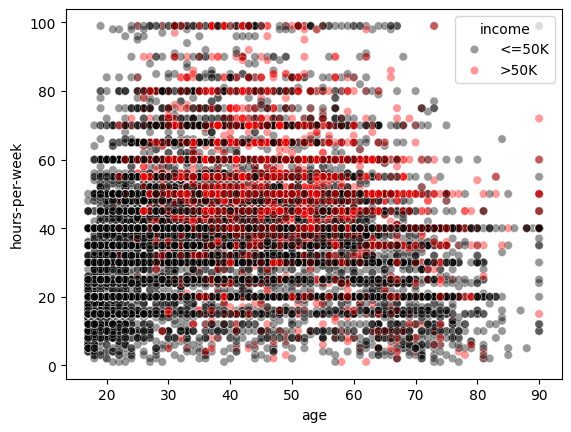

In [42]:
sns.scatterplot(data=df, x='age', y='hours-per-week', hue='income', alpha=0.4, palette={'<=50K': 'black', '>50K': 'red'})

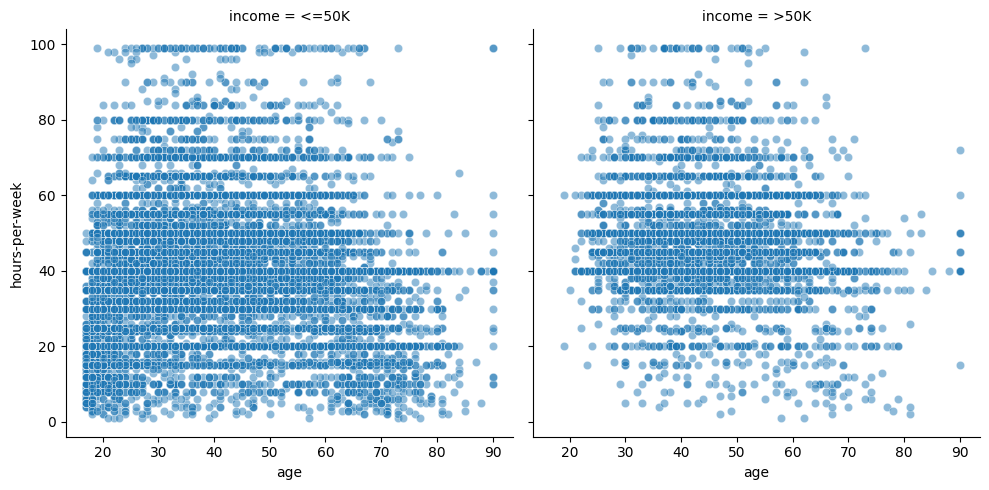

In [50]:
sns.relplot(kind='scatter', data=df, x='age', y='hours-per-week', alpha=0.5, col='income')

*There is no obnious relationship between 'age' and 'hours-per-week'*

## Histogram

<Axes: xlabel='age', ylabel='Count'>

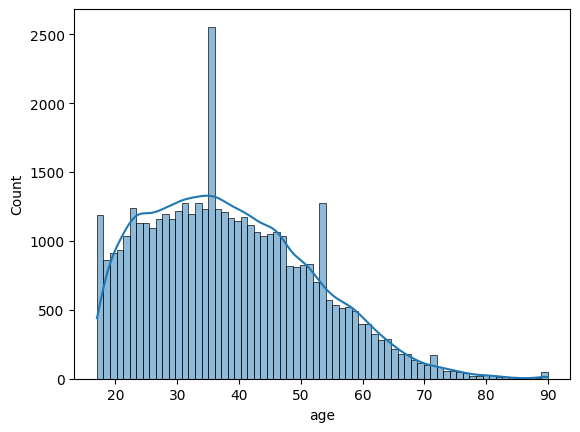

In [47]:
sns.histplot(data=df, x='age', kde=True)

*Most of the individuals are the age between 30 and 40.*

## Box Plot

<Axes: xlabel='age'>

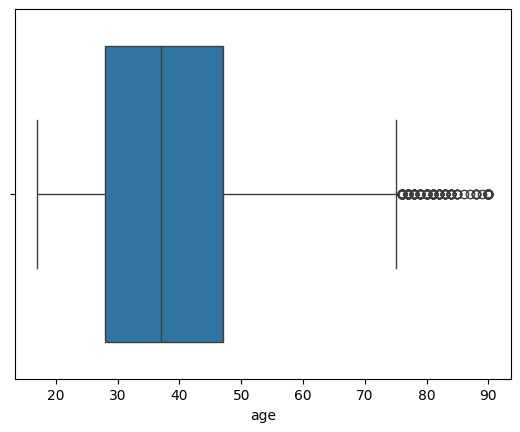

In [48]:
sns.boxplot(data=df, x='age')

## Pair Plot

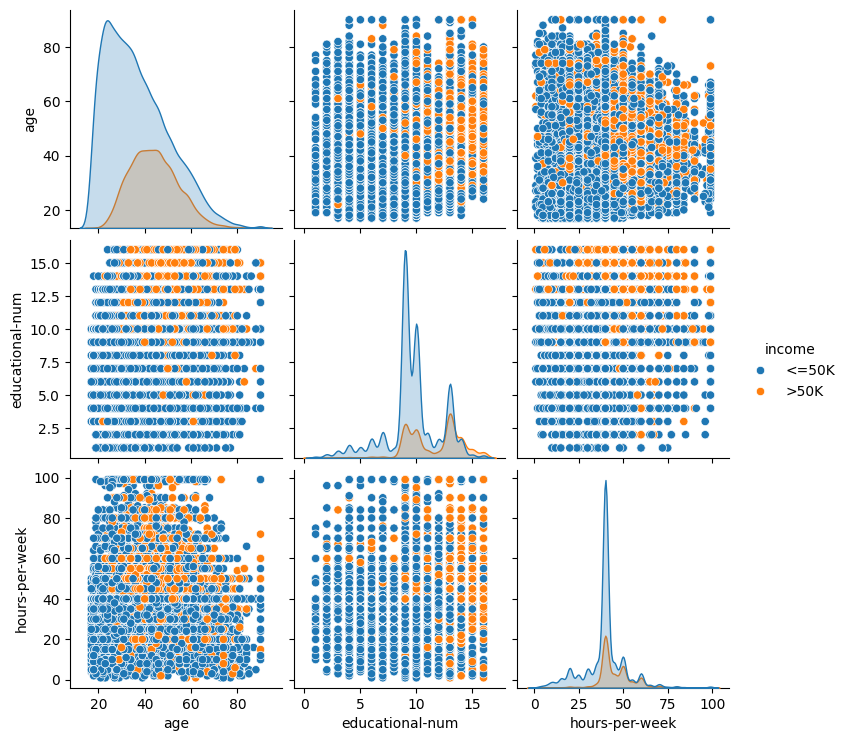

In [59]:
sns.pairplot(data=df, vars=['age', 'educational-num', 'hours-per-week'], hue='income')


## ⚙️ Step 5: Encoding Categorical Data & Normalizing Numerical Features

Before PCA can be applied, it's important to convert categorical data into numerical form and scale numerical features:

- Apply **One-Hot Encoding** to transform categorical variables (`workclass`, `education`, `gender`, etc.) using `pd.get_dummies()`.
- Normalize numerical variables (`age`, `fnlwgt`, `hours-per-week`, etc.) using `StandardScaler()` from sklearn.

After processing, display the first 5 rows of your cleaned and transformed dataset to verify results.

**Example:**

```python
df_encoded = pd.get_dummies(df, columns=['your-categorical-columns'])
scaler = StandardScaler()
df_encoded[your_numerical_columns] = scaler.fit_transform(df_encoded[your_numerical_columns])
df_encoded.head()
```


In [75]:
df_encoded = pd.get_dummies(df, columns=df.select_dtypes(include='object').columns)
scaler = StandardScaler()
df_encoded[df.select_dtypes(include='number').columns] = scaler.fit_transform(df_encoded[df.select_dtypes(include='number').columns])
df_encoded.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_<=50K,income_>50K
0,-1.024983,0.350889,-1.221559,-0.146733,-0.21878,-0.078120,False,False,True,False,...,False,False,False,False,False,True,False,False,True,False
1,-0.041455,-0.945878,-0.438122,-0.146733,-0.21878,0.754701,False,False,True,False,...,False,False,False,False,False,True,False,False,True,False
2,-0.798015,1.393592,0.737034,-0.146733,-0.21878,-0.078120,False,True,False,False,...,False,False,False,False,False,True,False,False,False,True
3,0.412481,-0.278420,-0.046403,0.877467,-0.21878,-0.078120,False,False,True,False,...,False,False,False,False,False,True,False,False,False,True
4,-0.344079,0.084802,-1.613277,-0.146733,-0.21878,-0.910942,False,False,True,False,...,False,False,False,False,False,True,False,False,True,False



## 🛠️ Step 6: Implement PCA Manually

Gain deeper insight by manually implementing PCA. Create a function called `perform_pca()` that:

- Accepts normalized data and the number of principal components (`n_components`) as arguments.
- Calculates covariance matrix, eigenvalues, and eigenvectors.
- Sorts eigenvectors based on eigenvalues and selects top components.
- Projects data onto the selected components to reduce dimensionality.

Execute PCA for 2 components and verify by displaying the top 5 rows of the result.

**Structure your function as follows:**

```python
def perform_pca(data, n_components=2):
    # Your PCA code here
    return pca_result
```


In [129]:
def perform_pca(data, n_components=2):
    data_numeric = data.astype(float)

    covariance_matrix = np.cov(data_numeric, rowvar=False)

    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenvectors = eigenvectors[:, sorted_indices]

    selected_eigenvectors = sorted_eigenvectors[:, :n_components]

    pca_result = np.dot(data_numeric, selected_eigenvectors)

    return pca_result, selected_eigenvectors

In [145]:
pca_result, selected_eigenvectors = perform_pca(df_encoded[['age', 'hours-per-week']], n_components=2)

In [146]:
pca_result[:5]

array([[-0.78001159,  0.66953314],
       [ 0.50434134,  0.56296762],
       [-0.619521  ,  0.50904255],
       [ 0.23642882, -0.34690727],
       [-0.88743352, -0.40083233]])

In [147]:
pca_df = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])

In [148]:
pca_df.head()

,PC1,PC2
0,-0.780012,0.669533
1,0.504341,0.562968
2,-0.619521,0.509043
3,0.236429,-0.346907
4,-0.887434,-0.400832



## 📈 Step 7: Visualizing and Interpreting PCA Results

Now, visualize the PCA output clearly:

- **Scatter plot:** Plot the two principal components to visualize data separation and clusters.
- **Heatmap:** Illustrate correlations between original features and PCA components using a heatmap.
- Provide a brief interpretation of what each principal component represents in terms of original features.

**Visualization Tools:**

- Use `plt.scatter()` for scatter plots.
- Use `sns.heatmap()` for correlation heatmaps.

Reflect on your findings briefly in your analysis.


## Scatter Plot

Text(0.5, 1.0, 'PCA Result: Scatter Plot of Principal Components')

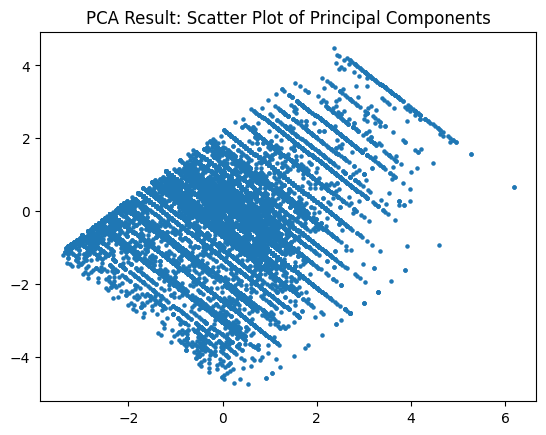

In [153]:
plt.scatter(pca_df['PC1'], pca_df['PC2'], s=5)
plt.title('PCA Result: Scatter Plot of Principal Components')

In [156]:
combined_data = np.hstack((df_encoded[['age', 'hours-per-week']].to_numpy(), pca_result))

In [158]:
correlation_matrix = np.corrcoef(combined_data, rowvar=False)

In [160]:
correlation_with_pca = correlation_matrix[:2, 2:]

Text(0.5, 1.0, 'Heatmap of Feature Correlations with PCA Components')

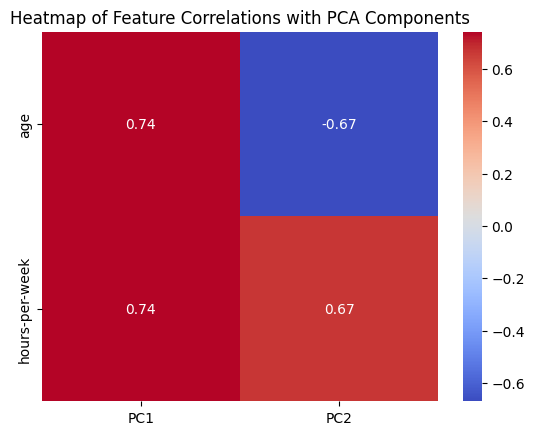

In [162]:
sns.heatmap(correlation_with_pca, annot=True, cmap='coolwarm', xticklabels=['PC1', 'PC2'], yticklabels=['age', 'hours-per-week'])
plt.title('Heatmap of Feature Correlations with PCA Components')

*PC1 is strongly associated with the 'age' feature. PC2 is capturing the relationship between 'hours-per-week' and 'age', with older individuals potentially working fewer hours per week.*


## 📉 Step 8: PCA Explained Variance

Determine how many principal components are needed by plotting the cumulative explained variance.

**Tasks:**
- Fit PCA from `sklearn.decomposition` to your encoded data.
- Plot the cumulative sum of the explained variance ratio.

**Hint:**  
```python
from sklearn.decomposition import PCA
pca = PCA().fit(your_data)
# plot cumulative explained variance here
```


In [163]:
from sklearn.decomposition import PCA

In [164]:
pca = PCA().fit(df_encoded)

In [165]:
explained_variance_ratio = pca.explained_variance_ratio_

In [166]:
cumulative_explained_variance = [sum(explained_variance_ratio[:i+1]) for i in range(len(explained_variance_ratio))]

Text(0.5, 1.0, 'Cumulative Explained Variance Plot')

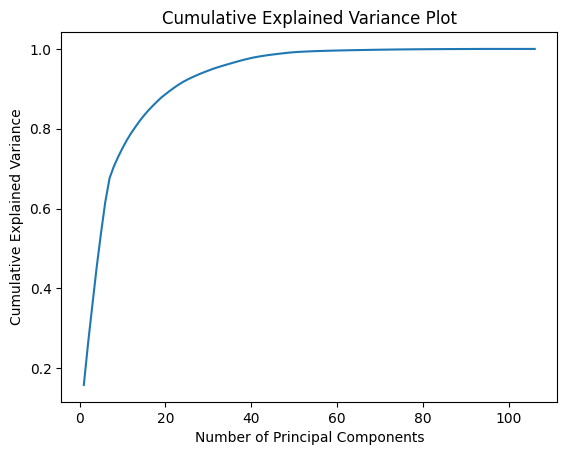

In [167]:
plt.plot(range(1, len(cumulative_explained_variance)+1), cumulative_explained_variance)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')


## 🌀 Step 9: K-means Clustering on PCA results

Apply K-means clustering (with 2 clusters) on your PCA-transformed data and visualize the clusters.

**Tasks:**

- Apply `KMeans` clustering from `sklearn.cluster`.
- Visualize clusters using scatter plots and mark cluster centers.

**Hint:**
```python
from sklearn.cluster import KMeans
# apply KMeans on PCA data
# visualize your clusters clearly
```


In [168]:
from sklearn.cluster import KMeans

In [169]:
pca_data = pca.transform(df_encoded)
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(pca_data)

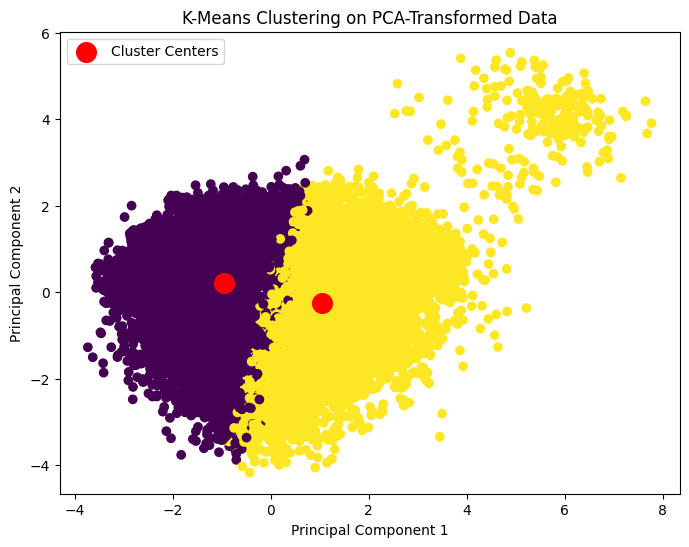

In [171]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Cluster Centers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering on PCA-Transformed Data')
plt.legend()


---
*Project designed by: Amirerfan Teimoori*
